# Adult Data Set Analysis

Dataset can be downloaded from this __[link](https://archive.ics.uci.edu/ml/datasets/adult)__.

Let’s first `import` some libraries that we are going to need for our analysis

In [53]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

%matplotlib inline

First we need to read the adult dataset from `data/adult.csv`  which contains comma separated columns and mark the values `?` as missing data points

In [9]:
original_data = pd.read_csv(
    "data/adult.csv",
    names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")

original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Statistical data

In [47]:
def summarize_data(df):
    print('Continuous Data : ')
    print(df.describe())
    print('\n\n')
    print('Categorical Data : ')
    for column in df.columns:
        if df.dtypes[column] == np.object : # Categorical Data
            print(column)
            print(df[column].value_counts())
        print()

summarize_data(original_data)

Continuous Data : 
                Age        fnlwgt  Education-Num  Capital Gain  Capital Loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours per week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  



Categorical Data : 

Workclass
Private   

Data Dictionary
1. Categorial Attributes
    - workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
        - Individual work category
    - education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    - Individual's highest education degree
    - marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
        - Individual marital status
    - occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
        - Individual's occupation
    - relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
        - Individual's relation in a family
    - race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
        - Race of Individual
    - sex: (categorical) Female, Male.
    - native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
        - Individual's native country

2. Continuous Attributes
    - age: continuous.
        - Age of an individual
    - education-num: number of education year, continuous.
        - Individual's year of receiving education
    - fnlwgt: final weight, continuous.
        - The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
    - capital-gain: continuous.
    - capital-loss: continuous.
    - hours-per-week: continuous.
        - Individual's working hour per week

Check if there are any NaNs in the dataframe and count every columns

In [38]:
original_data.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable) and was first introduced by Karl Pearson. It differs from a bar graph, in the sense that a bar graph relates two variables, but a histogram relates only one. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

Histogram can be summarized roughly as an inventory of what "kinds of items" you have and "how many of each kind" you have.  In computer vision, histogram appears a lot and many times helps to introduce some sort of robustness to your method. For example a bunch of techniques called local features/descriptors make use of the histogram of the image gradient in an image region. This summary representation helps you compare different images without being affected too much by variations in pixel values, shifts and tilts, etc. that change the individual pixel values significantly. So, histogram has the benefit of a summary data structure that is robust to certain changes that you want to ignore in the raw data.

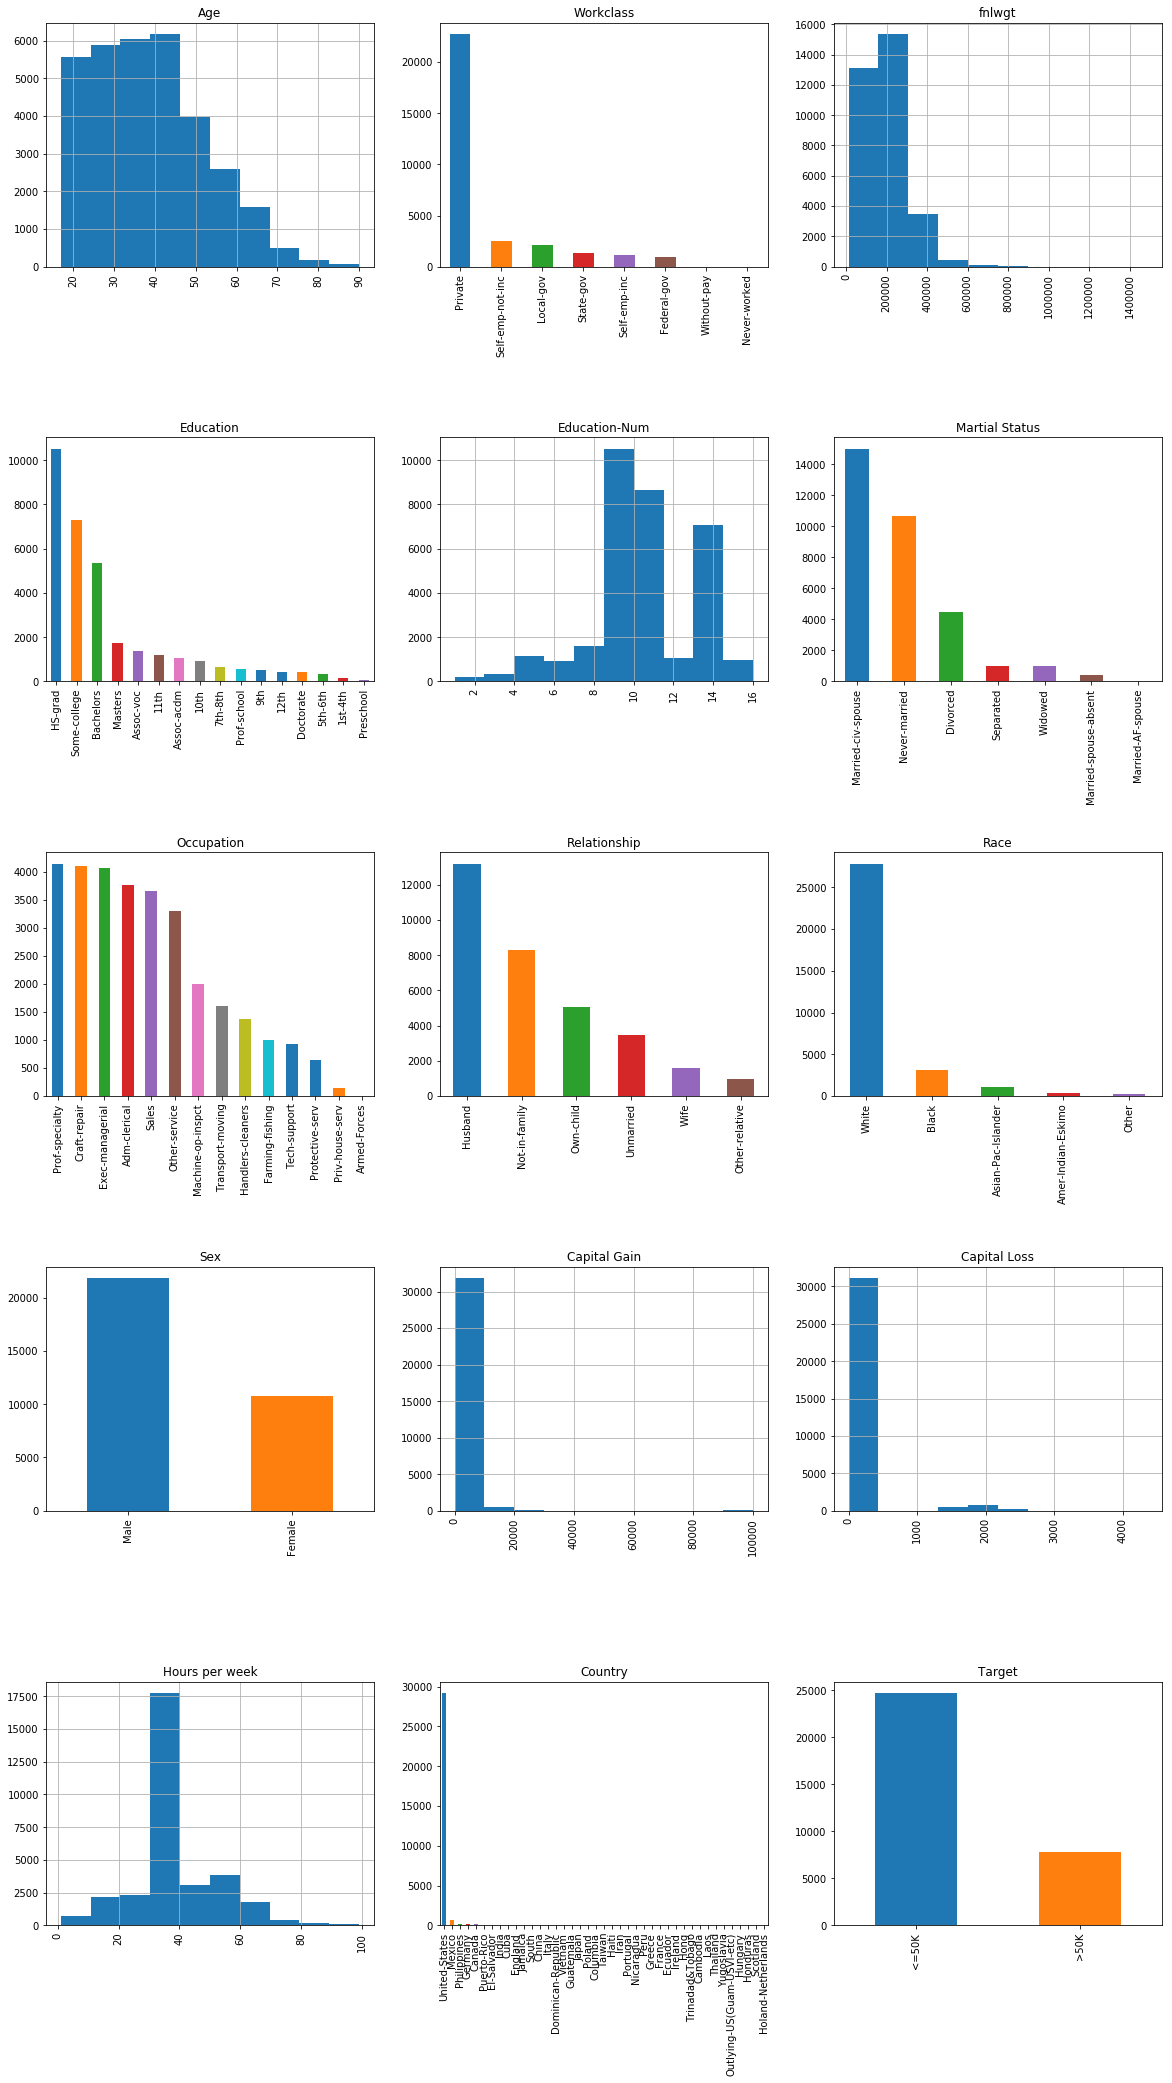

In [28]:
def make_histogram(df):
    fig = plt.figure(figsize=(20,35))
    COL = 3
    ROW = math.ceil(float(df.shape[1])/COL)
    
    for i , column in enumerate(df.columns):
        ax = fig.add_subplot(ROW, COL, i+1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            df[column].value_counts().plot(kind="bar", axes = ax)
        else:
            df[column].hist(axes = ax)
            plt.xticks(rotation="vertical")
            
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    
make_histogram(original_data)

Terlihat di kumpulan histogram di atas menandkan bahwa banyak atribut yang tidak terdistribusi secara normal sehingga memerlukan metode khusus untuk menangani missing value.

Boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots handle large data effortlessly, but they do not retain the exact values and the details of the results of the distribution. These graphs allow a clear summary of large amounts of data.

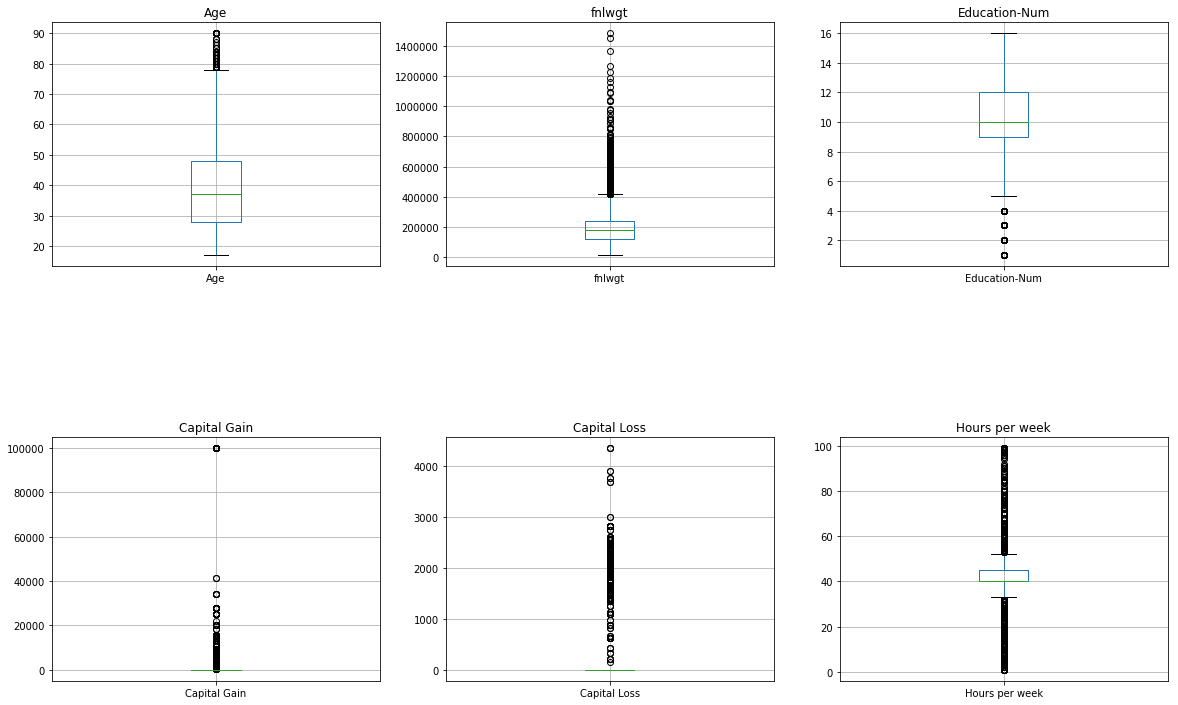

In [35]:
def make_boxplot(df):
    fig = plt.figure(figsize=(20,35))
    COL = 3
    ROW = math.ceil(float(df.shape[1])/COL)
    
    iterator = 1
    for column in df.columns:
        if df.dtypes[column] != np.object:
            ax = fig.add_subplot(ROW, COL, iterator)
            ax.set_title(column)
            pd.DataFrame(df[column], columns=[column]).boxplot()
            iterator+=1
            
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.show()

make_boxplot(original_data)

Meskipun terdapat banyak outlier sebenarnya data data tersebut termasuk kedalam data utama karena beberapa data meskipun berupa angka tetapi berupa categorical tipenya.

Pra-Processing Process
proses yang akan dilakukan adl Imputasi menggunakan `SimpleImputer`

In [60]:
imputer_modus = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_modus.fit(original_data)
imputed_data = imputer_modus.transform(original_data)

imputed_dataframe = pd.DataFrame(imputed_data,
    columns=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
imputed_dataframe.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
